In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [3]:
def normalize(x):
    normalized_x = []
    for i in range(x.shape[1]):
        normalized_x.append((x[:,i] - np.mean(x[:,i]))/np.std(x[:,i]))
    normalized_x = np.array(normalized_x).T
    return normalized_x

In [4]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sqrt(np.mean((X.dot(B) - Y) ** 2))
    return J

In [5]:
def batch_gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    for iteration in range(iterations):
        h = X.dot(B)
        loss = h - Y
        gradient = X.T.dot(loss) / m
        B = B - alpha * gradient
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
    return B, cost_history

In [8]:
x = np.array(df[['week','center_id','checkout_price','base_price','emailer_for_promotion','homepage_featured']])
y = np.array(df['num_orders'])
X = normalize(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)
B = np.zeros(X_train.shape[1])
alpha = 0.001
iter_ = 5000
beta, loss = batch_gradient_descent(X_train, y_train, B, alpha, iter_)
beta0 = np.median(y - X.dot(beta))

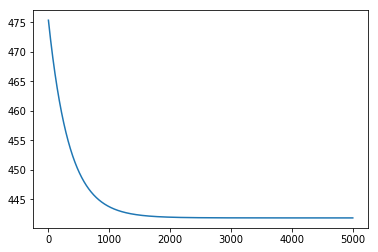

In [9]:
plt.plot(loss)

In [10]:
predicted_y = X_test.dot(beta) + beta0
error = np.sqrt(np.sum((y_test - predicted_y)**2))
print(error)

132933.15418574028
